In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [46]:
RG = pokemon[(pokemon['Class 1']=='Rock') | (pokemon['Class 1']=='Grass')|(pokemon['Class 2']=='Rock') | (pokemon['Class 2']=='Grass')]
RG = RG.drop(RG[(RG['Class 1']=='Rock') & (RG['Class 2']=='Grass')].index) #удаляю покемонов относящихся к обоим классам
RG = RG.drop(RG[(RG['Class 1']=='Grass') & (RG['Class 2']=='Rock')].index)
Grass = RG[(RG['Class 1']=='Grass') | (RG['Class 2']=='Grass')]
Rock = RG[(RG['Class 1']=='Rock') | (RG['Class 2']=='Rock')]

<AxesSubplot:xlabel='Attack', ylabel='Count'>

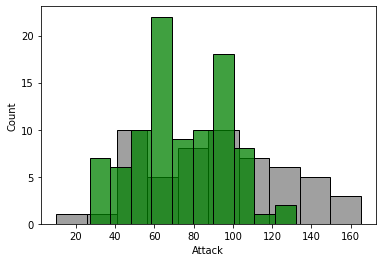

In [67]:
sns.histplot(data = Rock, x='Attack', color = 'grey', bins=10);
sns.histplot(data = Grass, x='Attack', color = 'green', bins=10)

Из графика выше видно, что распределение покемонов rock смещено вправо относительно покемонов grass и ольше походит на нормальное распределение. Давайте посмотрим на другие графики.

<AxesSubplot:xlabel='Attack'>

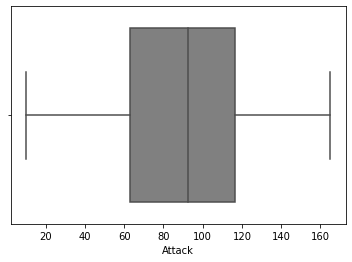

In [68]:
sns.boxplot(data=Rock, x='Attack', color='grey')

<AxesSubplot:xlabel='Attack'>

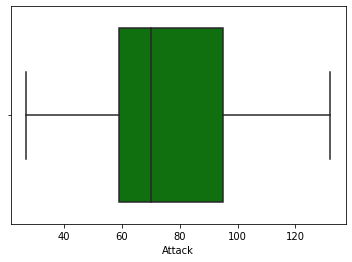

In [69]:
sns.boxplot(data=Grass, x='Attack', color='green')

По данным графикам можно сказать, что средняя атака rock покемонов на много больше чем у grass покемонов, но давайте дакажем это статиститчески. 

In [71]:
fvalue, pvalue = stats.f_oneway( Grass['Attack'], Rock['Attack'])
fvalue, pvalue

(13.908853861099336, 0.00027333381459902556)

Диспервионный анализ говорит о том, что мы можем отвергнуть Н0 (наши выборки равны). А чем больше F значение, тем больше различие в наших выборках

In [73]:
t , p  = stats.ttest_ind(Rock['Attack'], Grass['Attack'])
print("t = " + str(t))
print("p = " + str(p))

t = 3.729457582692065
p = 0.00027333381459902653


t-критейрий Стьюдента дает такие же результаты как и дисперсионный анализ

### Вывод: предположение о том, что атака grass покемонов выше - ошибочно

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [74]:
WN = pokemon[(pokemon['Class 1']=='Water') | (pokemon['Class 1']=='Water')|(pokemon['Class 2']=='Normal') | (pokemon['Class 2']=='Normal')]
WN = WN.drop(WN[(WN['Class 1']=='Water') & (WN['Class 2']=='Normal')].index) #удаляю покемонов относящихся к обоим классам
RG = WN.drop(WN[(WN['Class 1']=='Normal') & (WN['Class 2']=='Water')].index)
Water = WN[(WN['Class 1']=='Water') | (WN['Class 2']=='Water')]
Normal = WN[(WN['Class 1']=='Normal') | (WN['Class 2']=='Normal')]

In [81]:
print(len(Water))
print(len(Normal))

112
4


Выборки очень сильно отличаются по размерам

<AxesSubplot:xlabel='Speed', ylabel='Count'>

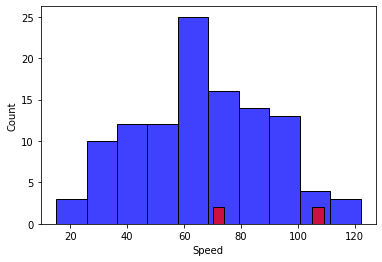

In [83]:
sns.histplot(data = Water, x='Speed', color = 'blue', bins=10);
sns.histplot(data = Normal, x='Speed', color = 'red', bins=10)

<AxesSubplot:xlabel='Speed'>

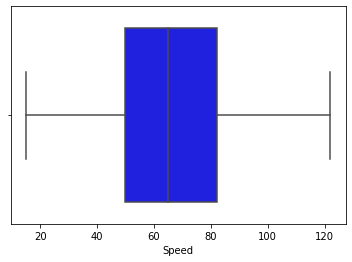

In [84]:
sns.boxplot(data=Water, x='Speed', color='blue')

<AxesSubplot:xlabel='Speed'>

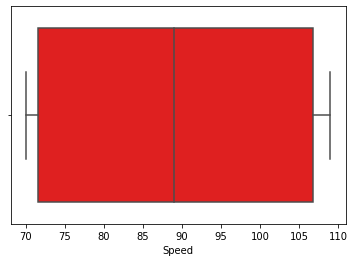

In [86]:
sns.boxplot(data=Normal, x='Speed', color='red')

Судя по графикам средняя скорость Normal покемонов выше чем у water покемонов

Как и в предыдущем анализе проведем дисперсионный анализ и воспользуемся t-тестом

In [87]:
fvalue, pvalue = stats.f_oneway( Water['Speed'], Normal['Speed'])
fvalue, pvalue

(3.968447790163462, 0.04875076869450466)

In [88]:
t , p  = stats.ttest_ind(Water['Speed'], Normal['Speed'])
print("t = " + str(t))
print("p = " + str(p))

t = -1.9920963305431452
p = 0.0487507686945045


p-value < 5% можно гвоорить об отвержении H0, а так же отрицательное t значение говорит о том, что среднее водяных покемонов меньше, чем среднее нормальных покемомонов

### Вывод: предположение о том, что скорость water покемонов выше - ошибочно


<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>



<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']



<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>





<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class